# Stroke Prediction
This dataset is taken from [here](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)



## Import dataset and check all of the features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv("../dataset/dataset1.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Exploratory Data Analysis (EDA)

### Check statistics info for numerical features

In [51]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Check numerical features and their outliers

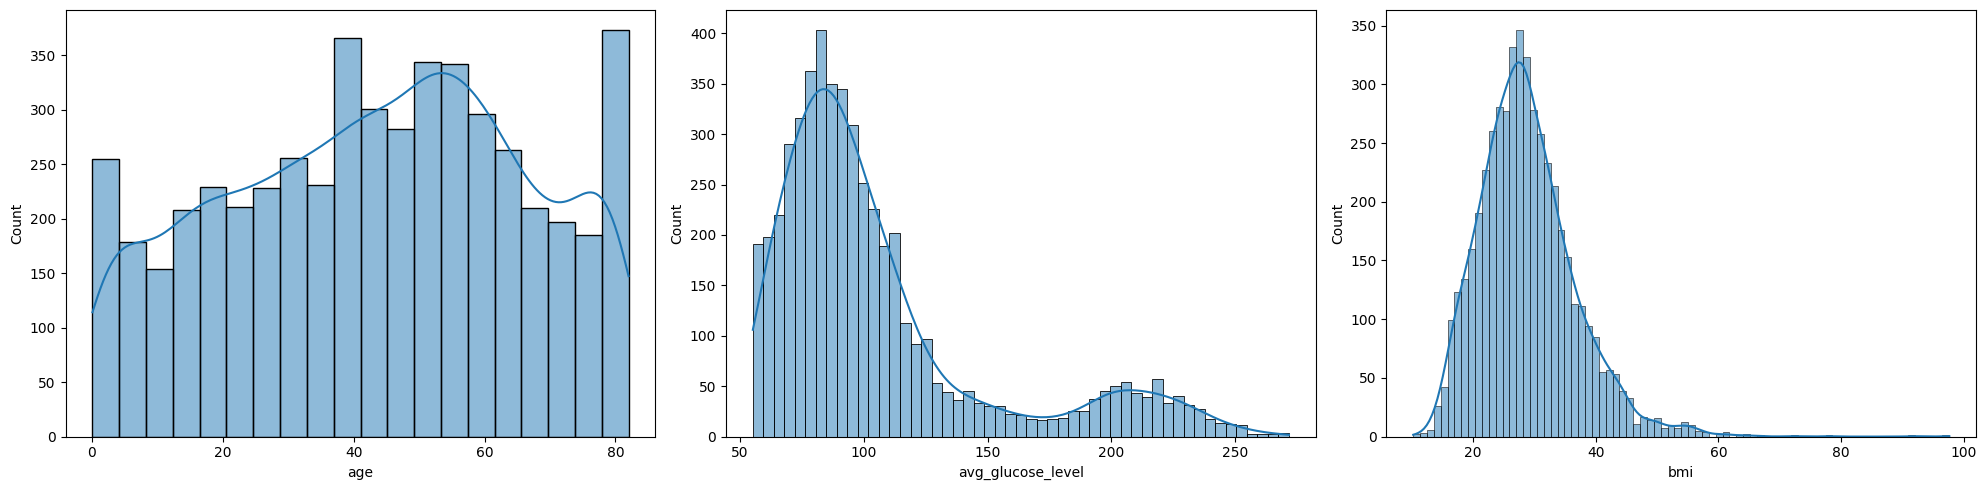

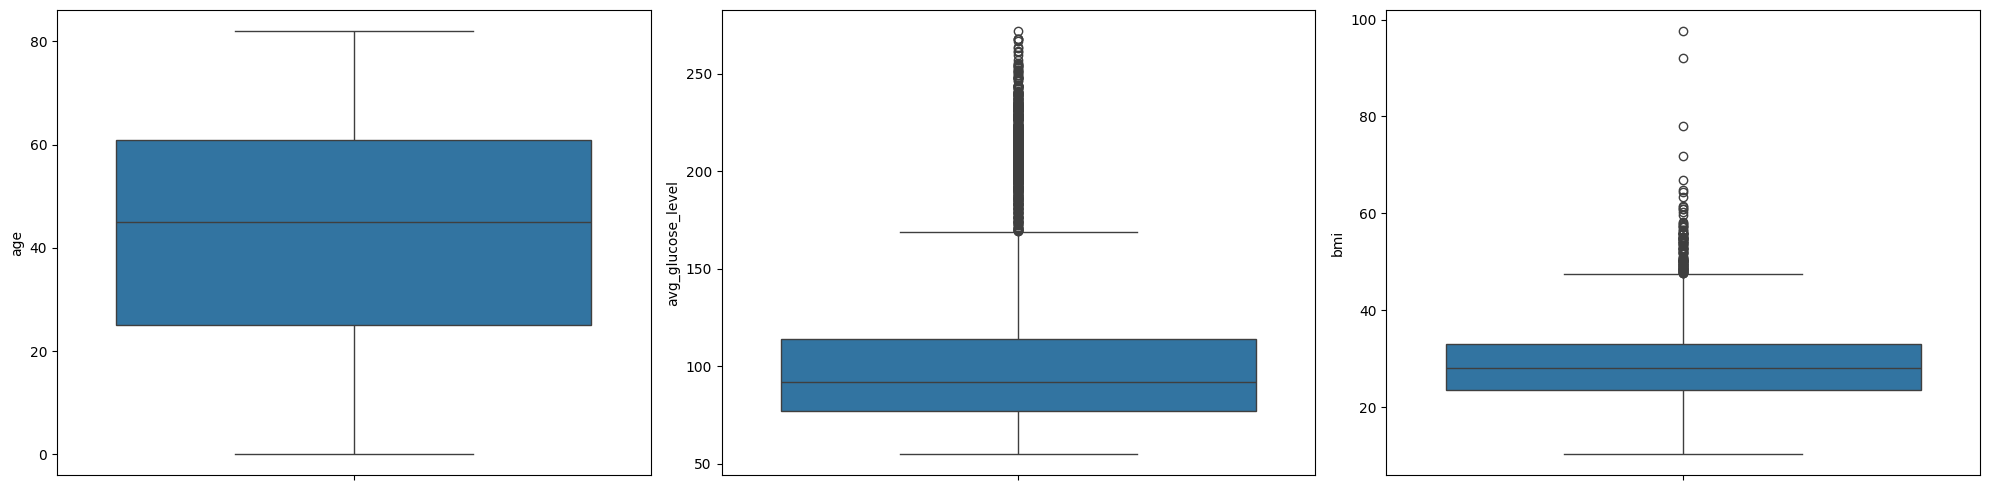

In [52]:
# List of continuous variables
num_df = ['age', 'avg_glucose_level', 'bmi']

# Plot the histograms for continuous variables
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

for feature, subplot in zip(num_df, ax.flatten()):
    sns.histplot(df[feature], kde=True, ax=subplot)

plt.tight_layout()
plt.show()

# Plot the boxplots for continuous variables
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for feature, subplot in zip(num_df, ax.flatten()):
    sns.boxplot(df[feature], ax=subplot)

plt.tight_layout()
plt.show()

### Insight:
**age** feature has no outliers

**avg_glucose_level** has lots of outliers and the distribution is right-skewed

**bmi** has some extreme outliers which need to be handled

### Check the label (stroke)

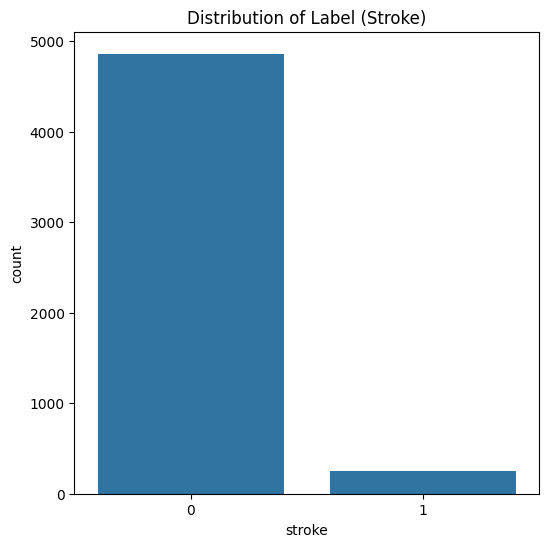

In [53]:
# Plot the label
plt.figure(figsize=(6, 6))
sns.countplot(x=df['stroke'])
plt.title('Distribution of Label (Stroke)')
plt.show()

### Insight:
The label is imbalanced with more instances of no stroke (0) than stroke (1).

### Check statistics info for categorical features

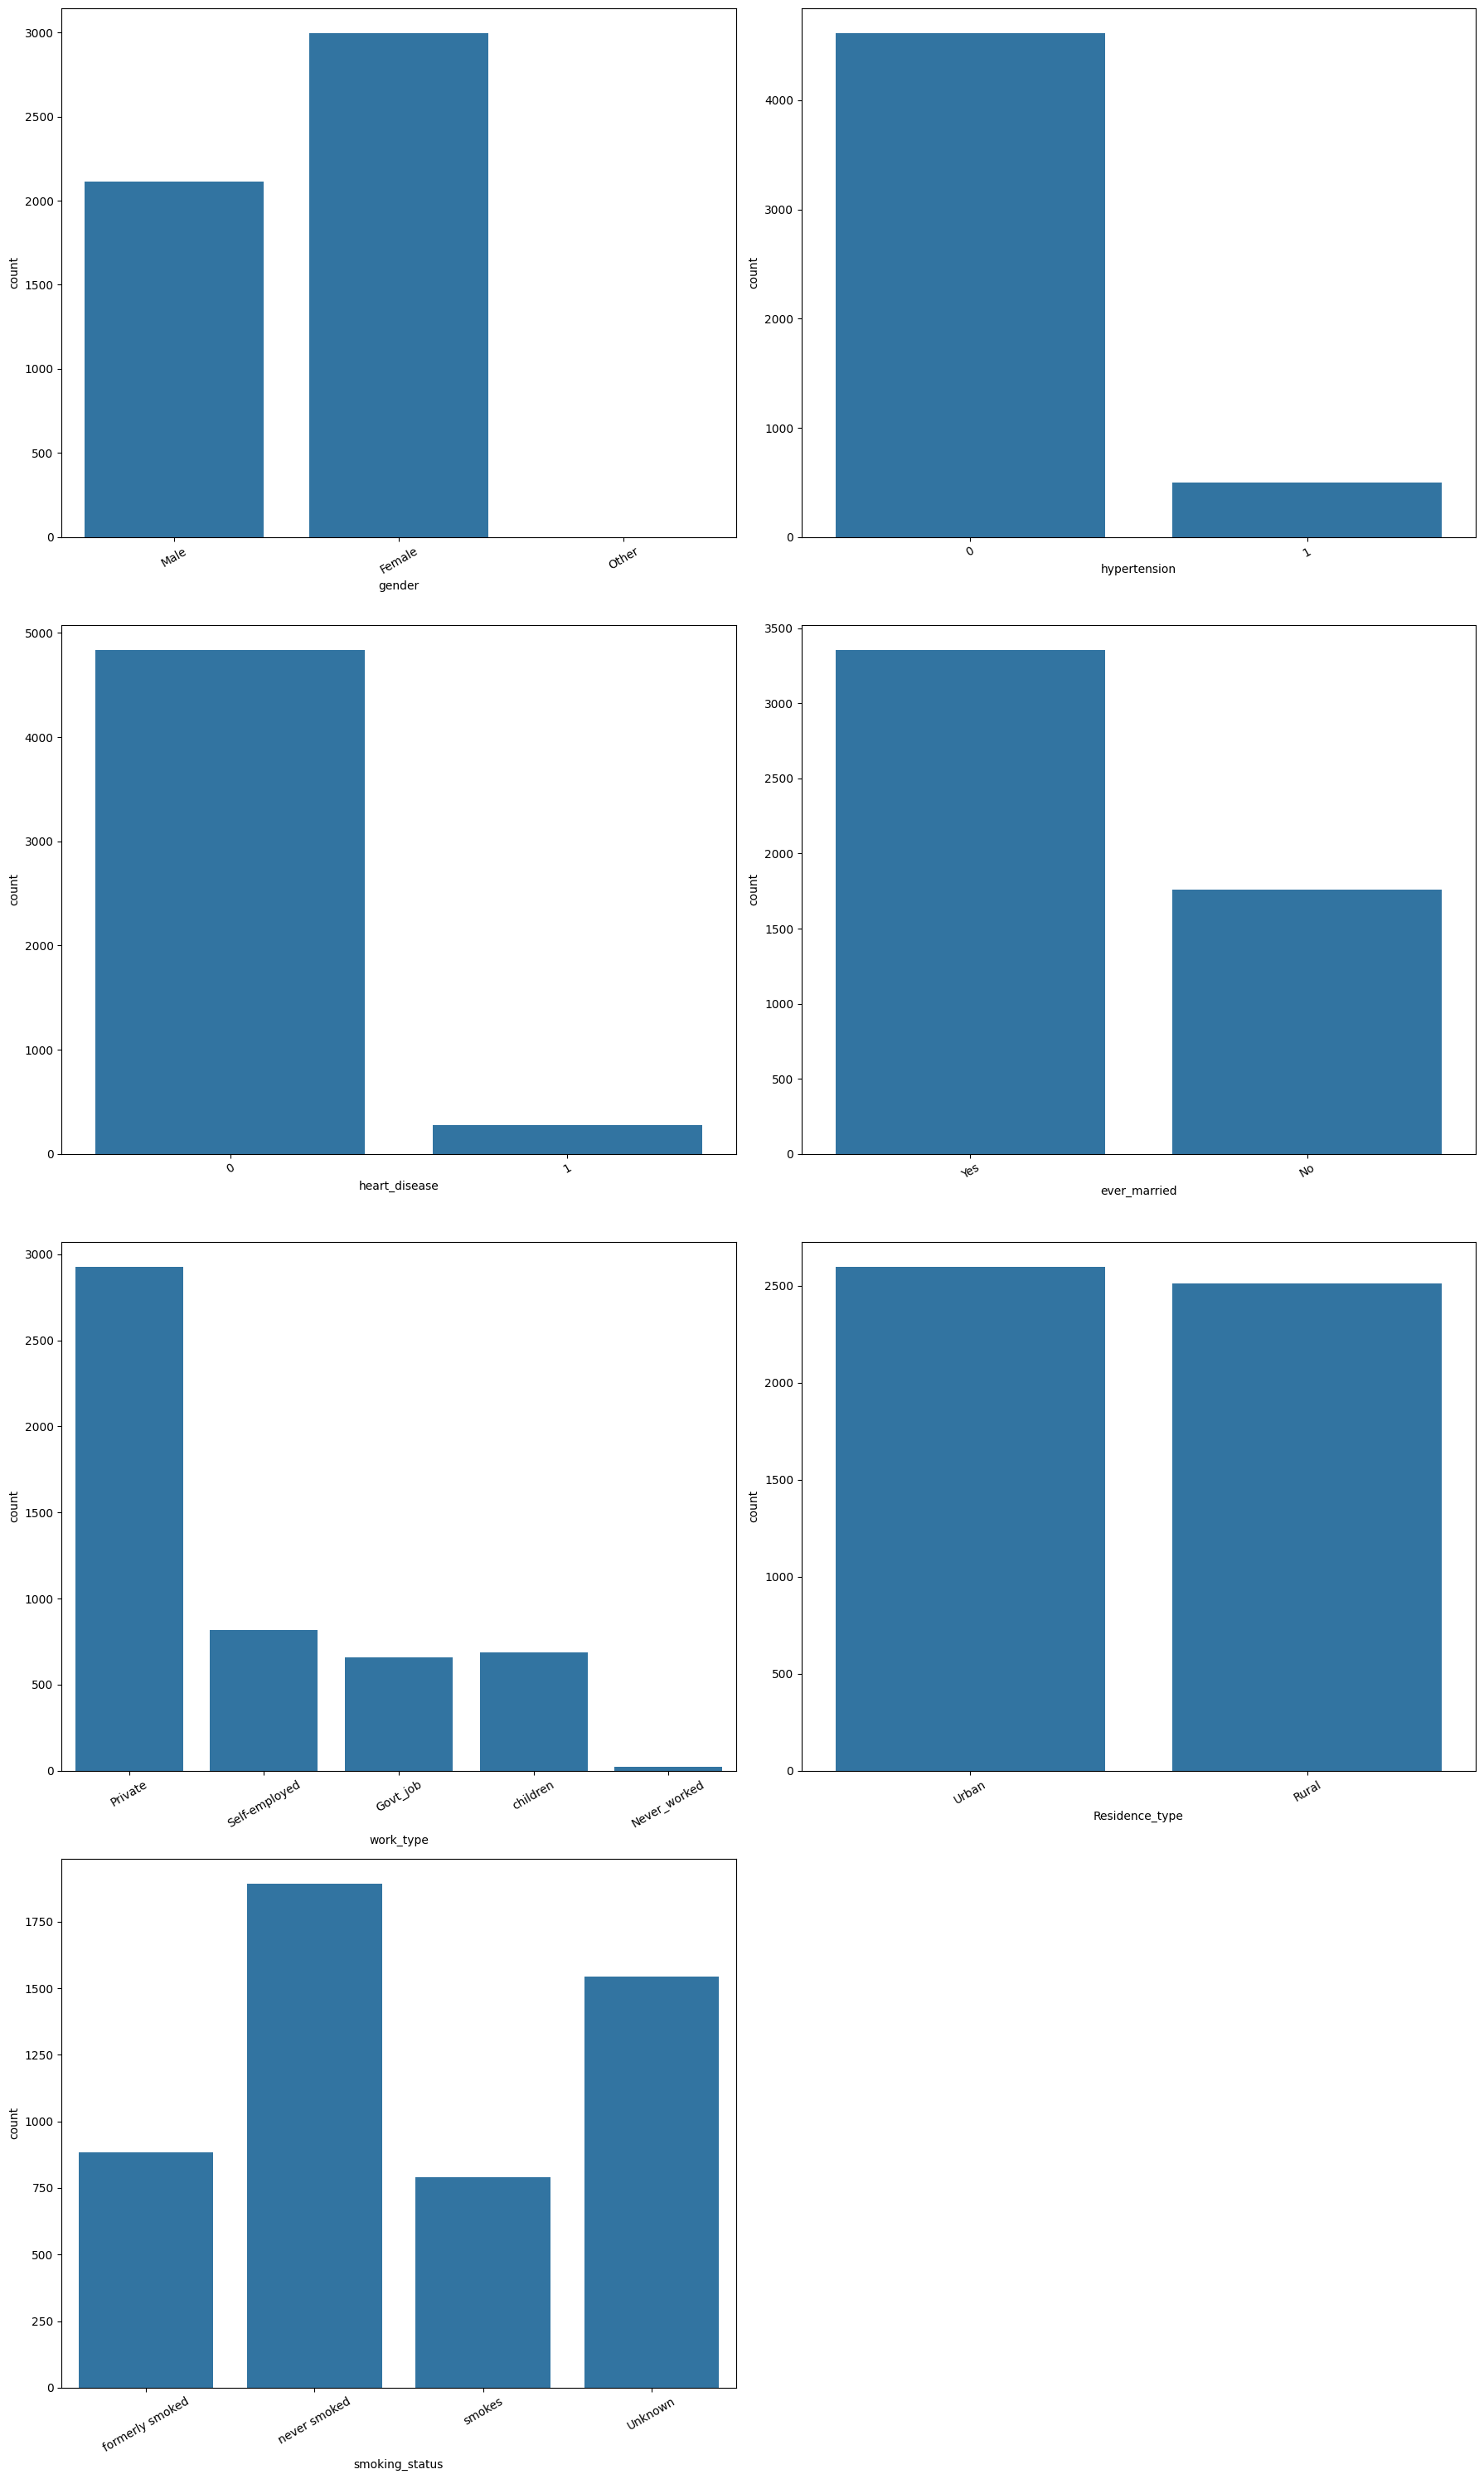

In [54]:
# List of categorical variables
cat_df = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Plot graph
fig, ax= plt.subplots(nrows= 4, ncols= 2, figsize= (18,30))
for feature, subplot in zip(cat_df, ax.flatten()):
    sns.countplot(x= feature, data= df, ax= subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)

# Delete all empty subplot (if any)
# len(cat_df) = filled subplot, len(ax.flatten()) = total available subplot
for idx in range(len(cat_df), len(ax.flatten())):
    fig.delaxes(ax.flatten()[idx])

plt.tight_layout()
plt.show()

### Insight:
**gender**: female is slightly greater than male.

**hypertension**: only few patients have hypertension.

**heart_disease**: only few patients have heart disease.

**ever_married**: most of the patients have married.

**work_type**: most of the patients work in private category, while the others are in self-employed, children, goverment, and never work category.

**Residence_type**: the number of patients who live in urban is almost the same as rural

**smoking_status**: most patients have never smoked, while the others remain unknown, formerly smoked, and smokes.


### Check the numerical features against the label

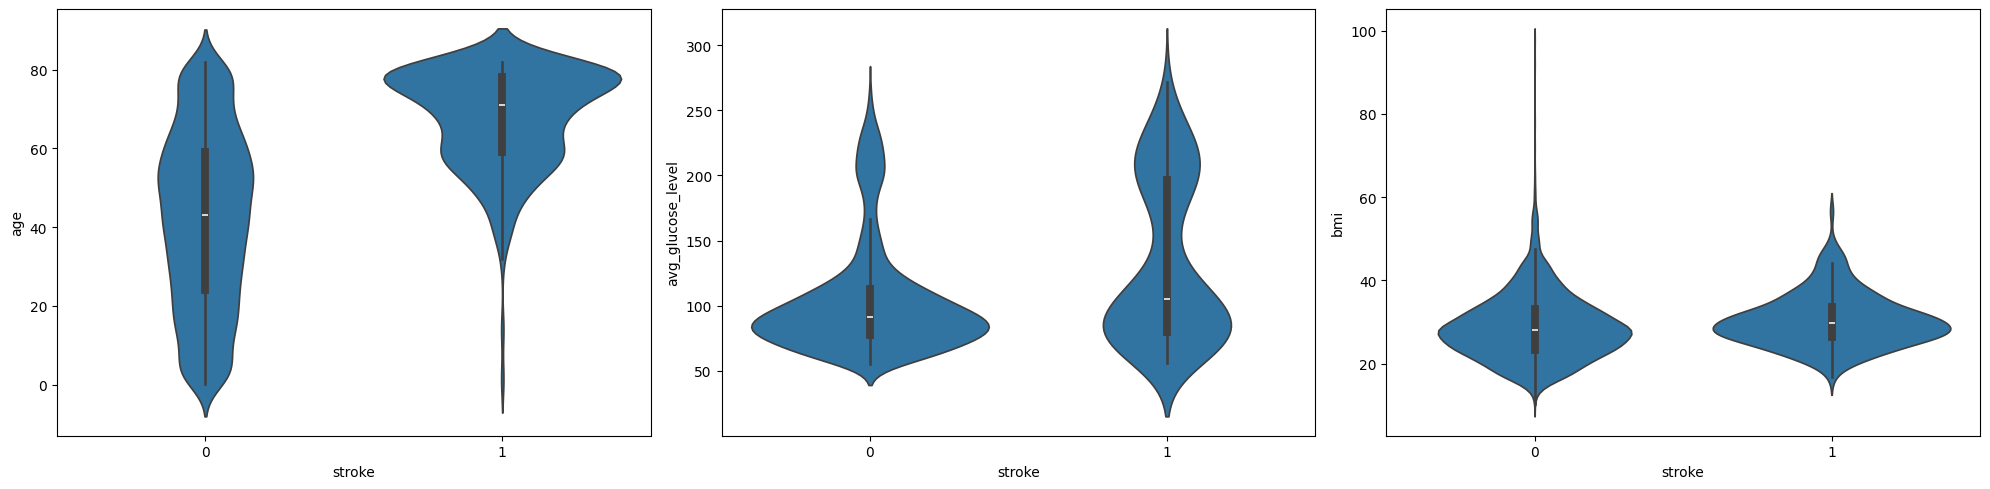

In [55]:
# Plot the continuous variables against the target variable 'stroke'
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

for var, subplot in zip(num_df, axs.flatten()):
    sns.violinplot(x=df['stroke'], y=df[var], ax=subplot)

plt.tight_layout()
plt.show()

### Insight:
**age**: stroke is likely to happen on older patients

**avg_glucose_level**: stroke patients tend to have higher average glucose level than non-stroke patients.

**bmi**: the BMI distributions for stroke and non-stroke patients are quite similar, which could mean that BMI might not be a strong predictor for stroke.

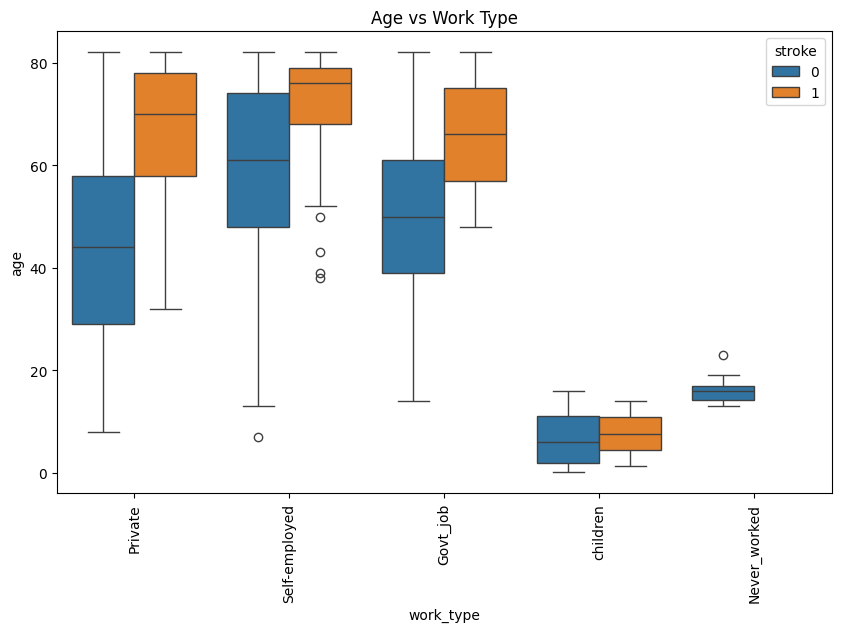

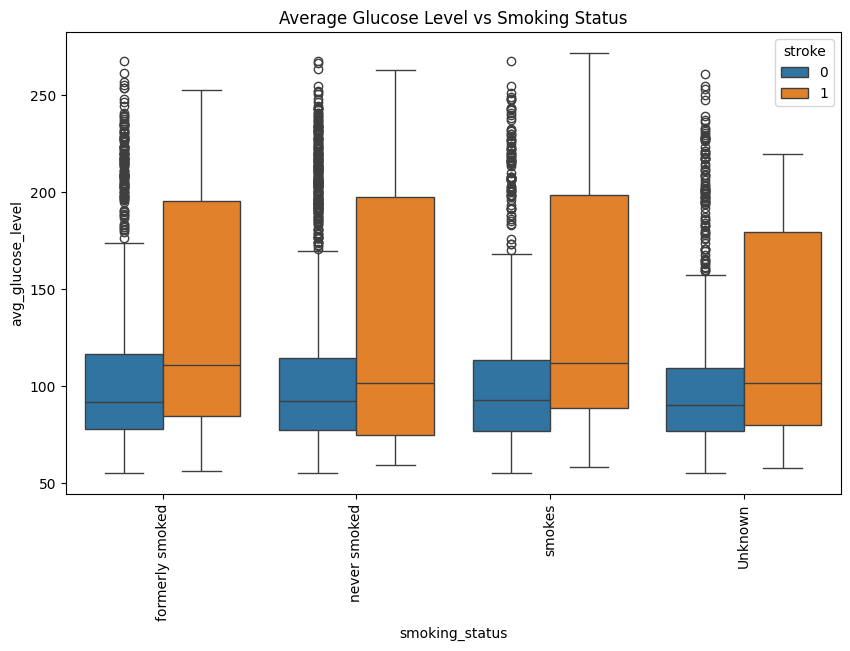

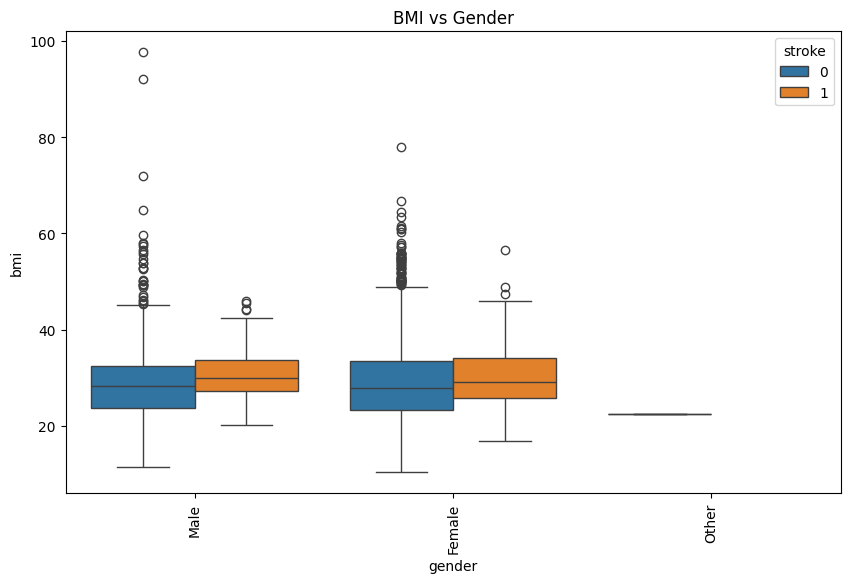

In [56]:
# Boxplot of age vs work_type
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['work_type'], y=df['age'], hue= df['stroke'])
plt.title('Age vs Work Type')
plt.xticks(rotation= 90)
plt.show()


# Boxplot of avg_glucose_level vs smoking_status
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['smoking_status'], y= df['avg_glucose_level'], hue= df['stroke'])
plt.title('Average Glucose Level vs Smoking Status')
plt.xticks(rotation= 90)
plt.show()

# Boxplot of bmi vs gender
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['gender'], y= df['bmi'], hue= df['stroke'])
plt.title('BMI vs Gender')
plt.xticks(rotation= 90)
plt.show()

### Insight:
- **Age vs Work Type**: Older people, especiallu those who are self-employed, seem to have a higher incidence of stroke.
- **Average Glucose Level vs Smoking Status**: The median glucose level for stroke patients is higher across all smoking status categories.
- **BMI vs Gender**: The BMI distributions for males and females are similar.

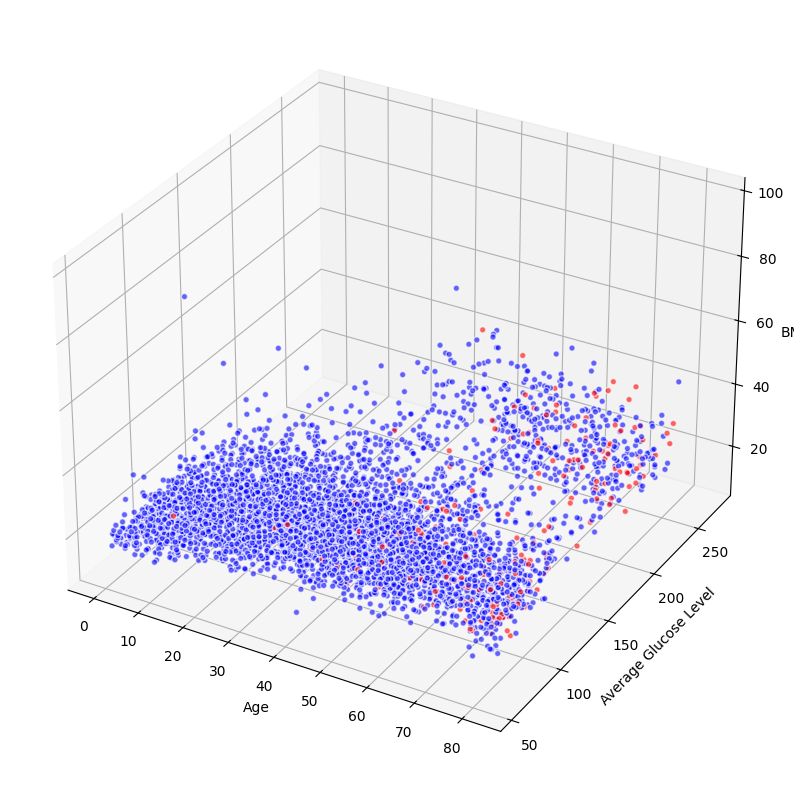

In [57]:
# Create a color map for the 'stroke' variable
colors = df['stroke'].map({0:'blue', 1:'red'})

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.scatter(df['age'], df['avg_glucose_level'], df['bmi'], c=colors, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Average Glucose Level')
ax.set_zlabel('BMI')
plt.show()

### Insight:

- Stroke patients generally are likely to happen to older patients and have higher glucose levels just like with the previous findings. 

- BMI does not appear to differentiate stroke patients from non-stroke patients since there is significant overlap in the BMI values of both groups.


### Check the categorical features against the label

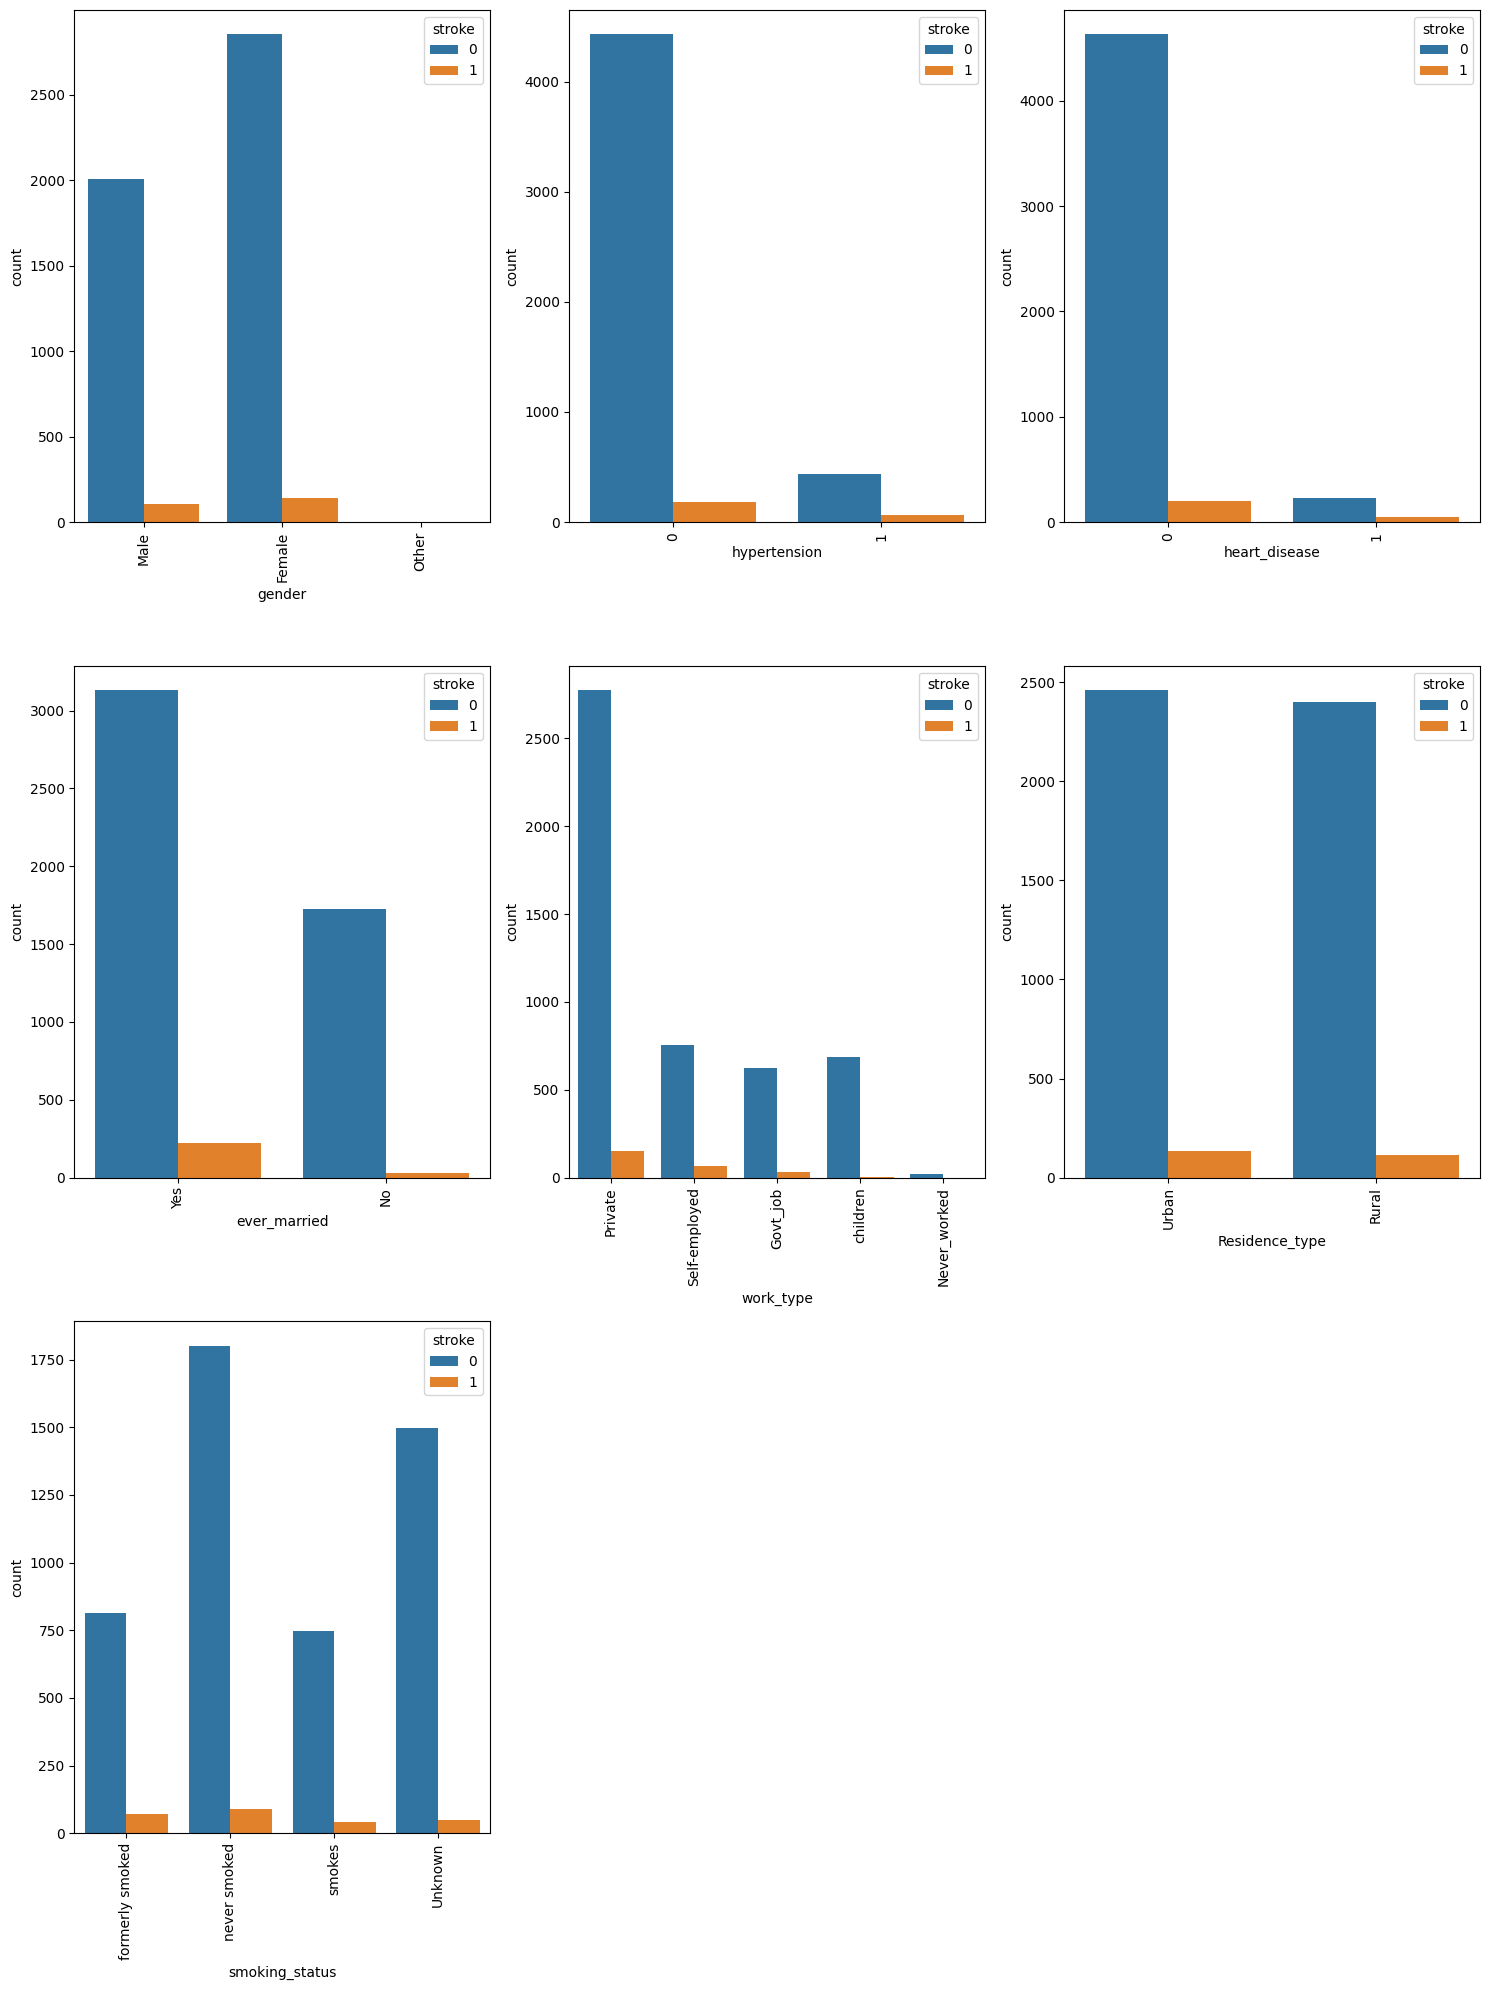

In [58]:
fig, ax = plt.subplots(3, 3, figsize=(15, 20))

for feature, subplot in zip(cat_df, ax.flatten()):
    sns.countplot(x=df[feature], hue=df['stroke'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

for idx in range(len(cat_df), len(ax.flatten())):
    fig.delaxes(ax.flatten()[idx])

plt.tight_layout()
plt.show()

### Insight:
**gender**: both male and female have simillar case of getting stroke.

**hypertension**: patients with hypertension have higher proportion of getting stroke.

**heart_disease**:patients with heart disease have higher proportion of getting stroke.

**ever_married**:patients who have married have higher proportion of getting stroke.

**work_type**: patients who work in private jobs tend to have higher proportion in getting cancer.

**Residence_type**: both urban and rural have simillar case of getting stroke.

**smoking_status**: patients who formerly smoked and smokes have higher proportion of getting stroke than the others.


# Data Preprocessing

### Check missing values

In [59]:
# Remove id column
df = df.drop('id',axis=1)

df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Insight:
BMI has lot of missing values. Since bmi is important, it's better to impute the missing data instead of deleting it.

There are two ways to impute the missing data:
1. Using SimpleImputer with strategy= mean, or
2. Using KNNeighbour.

In [60]:
# Simple Imputer
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean')
# imputed_data= imputer.fit_transform(df)

In [61]:
# KNNeighbour
from sklearn.neighbors import KNeighborsRegressor


def knn_imputer(df, target_feat):
  df= df.copy()

  numeric_df= df.select_dtypes(include=[np.number])
  non_empty_feature= numeric_df.loc[:, numeric_df.isna().sum() == 0].columns

  X_train= numeric_df.loc[numeric_df[target_feat].isna() == False, non_empty_feature]
  y_train= numeric_df.loc[numeric_df[target_feat].isna() == False, target_feat]
  X_test= numeric_df.loc[numeric_df[target_feat].isna() == True, non_empty_feature]

  knn = KNeighborsRegressor()
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  df.loc[df[target_feat].isna() == True, target_feat] = y_pred

  return df

target_feat = [col for col in df.columns if df[col].isnull().sum()!=0]

for col in target_feat:
    df = knn_imputer(df, col)

Mengapa menggunakan KNeighborsRegressor dibandingkan simple imputer?
Karena dengan menggunakan KNN, sample yang memiliki nilai NaN akan diisi dengan nilai baru berdasarkan kedekatan sample tersebut dengan sample lainnya dengan meninjau fitur2 lain yang dimiliki oleh sample terdekatnya sehingga nilai baru yang dihasilkan bisa lebih akurat.


### Check for duplicate values

In [62]:
dup = df.duplicated().any()
dup

False

### Handle Outliers

In [63]:
def find_outliers(feature):
  Q1 = feature.quantile(0.25)
  Q3 = feature.quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  return ((feature < lower_bound) | (feature > upper_bound)).sum()

outliers = {feature: find_outliers(df[feature]) for feature in ['age', 'avg_glucose_level', 'bmi']}
outliers

{'age': 0, 'avg_glucose_level': 627, 'bmi': 117}

In [64]:
# Apply log transformation
df['avg_glucose_level']= np.log(df['avg_glucose_level'])
df['bmi']= np.log(df['bmi'])

print({find_outliers(df[column]) for column in ['avg_glucose_level', 'bmi']})

{380, 68}


Kenapa menormalisasikan fitur yang memiliki outliers sebagai penanganan untuk outliers?
Karena banyak sample yang memiliki outliers (lebih dari 500) sehingga menghapus outliers bukanlah langkah yang tepat. Selain itu, mengubah nilai outliers ke batas atas/bawah berdasarkan boxplotnya juga tidak begitu bagus karena mungkin outliers tersebut memang berguna bagi model nantinya dalam mempelajari training data. Oleh karena itu, normalisasi fitur denga mengubahnya menjadi log(fitur) adalah langkah yang tepat.
Kenapa harus menggunakan log(fitur)? karena data memiliki persebaran *right-skewed*, data *right-skewed* biasanya mengikuti log-normal distributons, artinya adalah y= ln(X) akan terdistribusi normal jika X adalah log-normal distributions. 

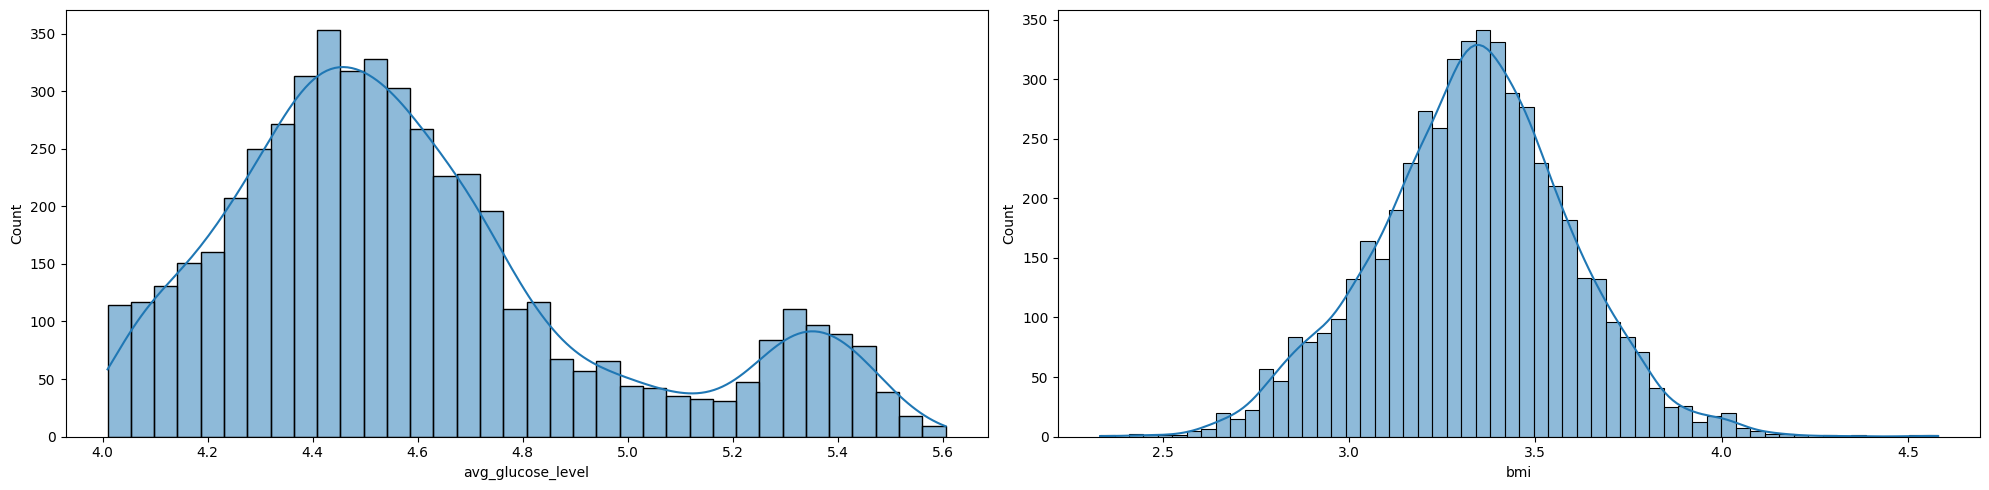

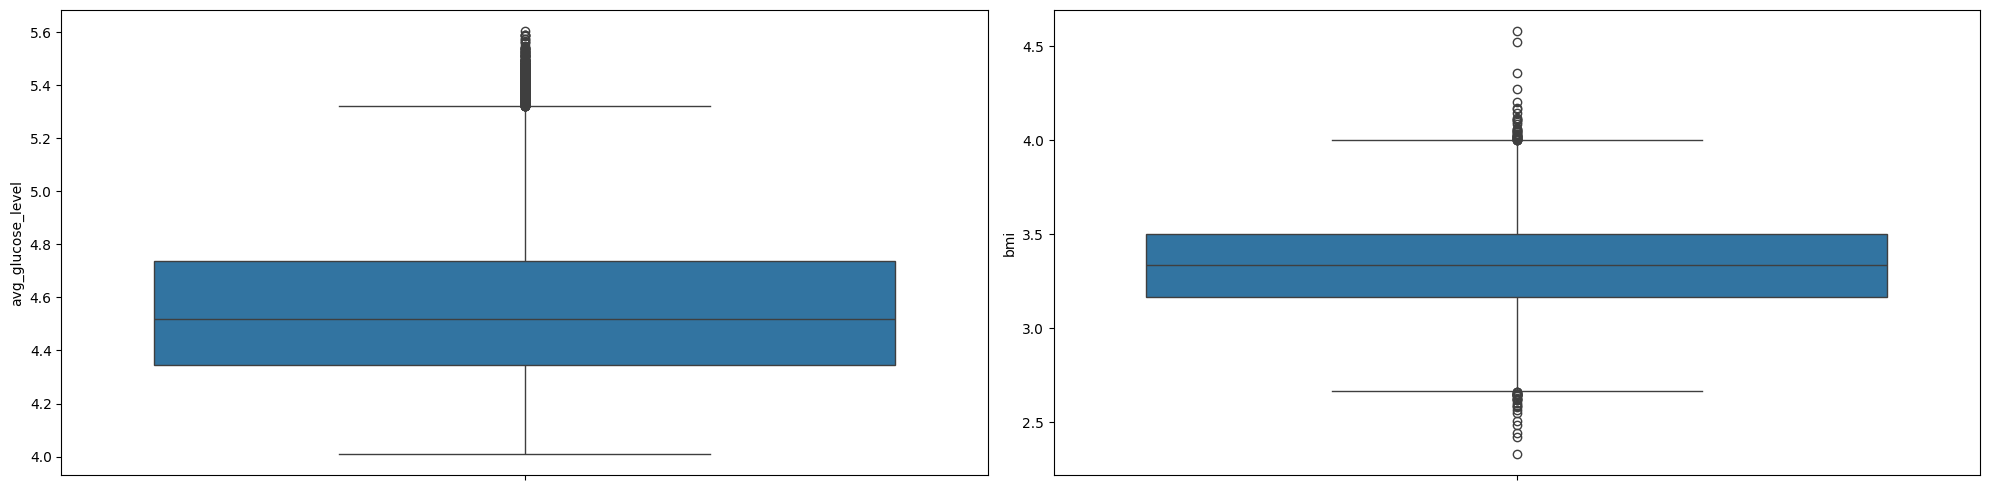

In [65]:
# Plot the hist and boxplot
num_df_with_outliers= ['avg_glucose_level', 'bmi']

fig, ax= plt.subplots(1, 2, figsize=(20,5))

for feat, subplot in zip (num_df_with_outliers, ax.flatten()):
  sns.histplot(df[feat], kde=True, ax= subplot)

plt.tight_layout()
plt.show()

fig, ax= plt.subplots(1, 2, figsize=(20,5))

for feat, subplot in zip (num_df_with_outliers, ax.flatten()):
  sns.boxplot(df[feat], ax= subplot)

plt.tight_layout()
plt.show()

Walaupun kedua fitur ini masih memiliki outliers, tetapi hal ini bisa dibiarkan saja karena persebarannya yang tidak terlalu jauh dan plot histogram juga menunjukkan kalau persebaran data sudah menddekati distribusi normal.

### Encoding Categorical Data

In [66]:
# Drop the row with Other for gender since it's just a single instance
df = df[df['gender'] != 'Other']

# Convert categorical variables to numerical format using one hot encoding
df= pd.get_dummies(df, columns= cat_df)
for feat in df.columns:
  if df[feat].dtype == 'bool':
    df[feat]= df[feat].astype('int')

Kenapa menggunakan one hot encoder?
Karena pada dataset ini, tidak ada kategori data yang memiliki urutan hierarki atau tingkatan tertentu (seperti tinggi, sedang, rendah) sehingga lebih baik menggunakan one hot encoder dibandingkan encoder lainnya seperti label encoding.

In [67]:
df.head()

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,5.432367,3.600048,1,0,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,5.309307,3.446171,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,4.662684,3.481240,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,5.143008,3.538057,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,5.159745,3.178054,1,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0


In [68]:
# Split the data into X and y
X= df.drop('stroke', axis=1)
y= df['stroke']

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5109 non-null   float64
 1   avg_glucose_level               5109 non-null   float64
 2   bmi                             5109 non-null   float64
 3   gender_Female                   5109 non-null   int32  
 4   gender_Male                     5109 non-null   int32  
 5   hypertension_0                  5109 non-null   int32  
 6   hypertension_1                  5109 non-null   int32  
 7   heart_disease_0                 5109 non-null   int32  
 8   heart_disease_1                 5109 non-null   int32  
 9   ever_married_No                 5109 non-null   int32  
 10  ever_married_Yes                5109 non-null   int32  
 11  work_type_Govt_job              5109 non-null   int32  
 12  work_type_Never_worked          5109 no

In [69]:
# Convert to numpy array so it will be easier to be processed
X= X.to_numpy()
y= y.to_numpy()

In [70]:
X_train,X_test,y_train,y_test= train_test_split(X, y, shuffle=True, test_size=0.1, random_state=42)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4598, 22), (511, 22), (4598,), (511,))

### KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Holdout validation
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)
print (f'Accuracy: {accuracy}')

Accuracy: 0.9393346379647749


In [73]:
# K-Cross validation
knn= KNeighborsClassifier(n_neighbors=5)
knn_cv= cross_val_score(knn, X, y, cv=5, scoring='accuracy')

print(knn_cv)
print(f'Accuracy: {knn_cv.mean()}')

[0.94716243 0.9481409  0.94422701 0.94324853 0.9510284 ]
Accuracy: 0.9467614536993201


In [74]:
from supervised_learning.knn import KNNeighbours

# Holdout validation    
knn_scratch= KNNeighbours(k=5, metrics='euclidean')
knn_scratch.fit(X_train, y_train)
y_pred= knn_scratch.predict(X_test)

accuracy= accuracy_score(y_test, y_pred)
print (f'Accuracy: {accuracy}')

Accuracy: 0.9393346379647749


In [75]:
# K-Cross validation
knn_scratch= KNNeighbours(k=5, metrics='euclidean')
knn_cv_scratch= cross_val_score(knn_scratch, X_train, y_train, cv=5)
print(knn_cv_scratch)
print(f"Mean accuracy: {knn_cv_scratch.mean()}")    

[0.94673913 0.94891304 0.94565217 0.94559304 0.94776931]
Mean accuracy: 0.9469333396413872


### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression

# Holdout validation
logreg = LogisticRegression(max_iter=2000, random_state=42)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9452054794520548

In [77]:
# K-Cross validation
logreg= LogisticRegression(max_iter=2000, random_state=42)
logreg_cv= cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print(logreg_cv)
print(f'Mean accuracy: {logreg_cv.mean()}')

[0.95107632 0.95107632 0.95107632 0.95009785 0.95298727]
Mean accuracy: 0.9512628155122084


In [78]:
from supervised_learning.logistic_regression import LogisticRegression

# Holdout validation
lr_scratch= LogisticRegression(learning_rate=0.01, iterations=2000, reg_term='l2')
lr_scratch.fit(X_train, y_train)
y_pred= lr_scratch.predict(X_test)
accuracy_score(y_test, y_pred)

0.9452054794520548

In [79]:
# K-Cross validation
lr_scratch= LogisticRegression(learning_rate=0.01, iterations=2000, reg_term='l2')
lr_scratch_cv= cross_val_score(lr_scratch, X, y, cv=5)
print(lr_scratch_cv)
print(f'Mean accuracy: {lr_scratch_cv.mean()}')

[0.95107632 0.95107632 0.95107632 0.95107632 0.95200784]
Mean accuracy: 0.9512626238425549


### Gaussian Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB

# Holdout validation
gaussian = GaussianNB()

gaussian.fit(X_train, y_train)
gaussian.score(X_test, y_test)

0.5264187866927593

In [81]:
# K-Cross validation
gaussian= GaussianNB()
gaussian_cv= cross_val_score(gaussian, X, y, cv=5, scoring='accuracy')
print(gaussian_cv)
print(f'Mean accuracy: {gaussian_cv.mean()}')

[0.54403131 0.53228963 0.5518591  0.54109589 0.55925563]
Mean accuracy: 0.5457063122566994


In [82]:
from supervised_learning.gaussian_naive_bayes import GaussianNaiveBayes

# Holdout validation
gnb_scratch= GaussianNaiveBayes()
gnb_scratch.fit(X_train, y_train)
y_pred= gnb_scratch.predict(X_test)
accuracy_score(y_test, y_pred)

0.37573385518590996

In [83]:
# K-Cross validation
gnb_scratch= GaussianNaiveBayes()  
gnb_scratch_cv= cross_val_score(gnb_scratch, X, y, cv=5)
print(gnb_scratch_cv)
print(f'Mean accuracy: {gnb_scratch_cv.mean()}')

[0.38551859 0.40215264 0.37671233 0.3816047  0.40254652]
Mean accuracy: 0.3897069562667351


### Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Holdout validation
dt= DecisionTreeClassifier(random_state=42, min_samples_split=4, max_depth=4)
dt.fit(X_train, y_train)
cross_val_score(dt, X_test, y_test, cv=5, scoring='accuracy').mean()

0.92177803160099

In [85]:
# K-Cross validation
dt= DecisionTreeClassifier(random_state=42, min_samples_split=4, max_depth=4)
dt_cv= cross_val_score(dt, X, y, cv=5, scoring='accuracy')
print(dt_cv)
print(f'Mean accuracy: {dt_cv.mean()}')

[0.95009785 0.95107632 0.95107632 0.94911937 0.9510284 ]
Mean accuracy: 0.9504796533079307


In [86]:
from supervised_learning.decision_tree import DecisionTree

# Holdout validation
dt_scratch= DecisionTree(max_depth=5)
dt_scratch.fit(X_train, y_train)
y_pred= dt_scratch.predict(X_test)
accuracy_score(y_test, y_pred)

0.9412915851272016

In [87]:
# K-Cross validation
dt_scratch= DecisionTree(max_depth=5)
dt_scratch_cv= cross_val_score(dt_scratch, X, y, cv=5)
print(dt_scratch_cv)
print(f'Mean accuracy: {dt_scratch_cv.mean()}')

[0.93933464 0.9481409  0.94129159 0.94520548 0.94613124]
Mean accuracy: 0.9440207693236553


### SVM

In [88]:
from sklearn import svm

# Holdout validation
clf = svm.SVC(max_iter= 1000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9452054794520548

In [89]:
# K-Cross validation
clf_cv= cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(clf_cv)
print(f'Mean accuracy: {clf_cv.mean()}')

[0.95107632 0.95107632 0.95107632 0.95107632 0.95200784]
Mean accuracy: 0.9512626238425549


In [90]:
from supervised_learning.svm import SVM

# Holdout validation
svm_scratch = SVM(learning_rate=0.01, iterations=1000)
svm_scratch.fit(X_train, y_train)
y_pred = svm_scratch.predict(X_test)
accuracy_score(y_test, y_pred)

0.8864970645792564

In [91]:
# K-Cross validation
svm_scratch = SVM(learning_rate=0.01, iterations=1000)
svm_scratch_cv = cross_val_score(svm_scratch, X, y, cv=5)
print(svm_scratch_cv)
print(f'Mean accuracy: {svm_scratch_cv.mean()}')

[0.95107632 0.95107632 0.95107632 0.95107632 0.95200784]
Mean accuracy: 0.9512626238425549


In [92]:
import tensorflow as tf

tf.random.set_seed(42)
model1= tf.keras.Sequential([
    tf.keras.Input(shape=(22,)),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='softmax'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
               optimizer= tf.keras.optimizers.Adam(),
               metrics= ['accuracy'])

model1.fit(X_train, y_train, epochs=20)

model1.evaluate(X_test, y_test)


Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step - accuracy: 0.9081 - loss: 0.5442
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.9484 - loss: 0.4327
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.9484 - loss: 0.3708
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.9484 - loss: 0.3263
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.9484 - loss: 0.2939
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.9484 - loss: 0.2702
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.9484 - loss: 0.2527
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.9484 - loss: 0.2397
Epoch 9/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.9484 - loss: 0.2301
Epoch 10/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.9484 - loss: 0.2229
Epoch 11/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.9484 - loss: 0.2175
Epoch 12/20
144/144 ━━━━━━━━━━

[0.21241241693496704, 0.9452054500579834]

In [94]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4598, 22), (511, 22), (4598,), (511,))

In [99]:
from supervised_learning.ann import NeuralNetwork, FullyConnectedLayer

nn_scratch= NeuralNetwork()
nn_scratch.add_layer(FullyConnectedLayer(input_size=22, output_size=32, activation='linear'))
nn_scratch.add_layer(FullyConnectedLayer(input_size=32, output_size=32, activation='relu'))
nn_scratch.add_layer(FullyConnectedLayer(input_size=32, output_size=32, activation='softmax')) 
nn_scratch.add_layer(FullyConnectedLayer(input_size=32, output_size=1, activation='sigmoid'))

nn_scratch.set_loss_function('binary_cross_entropy')
nn_scratch.train(X_train, y_train, epochs=20, batch_size=32, learning_rate=0.01)

y_pred= nn_scratch.predict(X_test)

# Convert predictions to binary values (0 or 1)
y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Epoch 1/20 - Loss: 0.19382326985063808
Epoch 2/20 - Loss: 0.19302748842285405
Epoch 3/20 - Loss: 0.19289933326671238
Epoch 4/20 - Loss: 0.19285740618156638
Epoch 5/20 - Loss: 0.19283783643838903
Epoch 6/20 - Loss: 0.19282679931159713
Epoch 7/20 - Loss: 0.19281981393168943
Epoch 8/20 - Loss: 0.1928150380725723
Epoch 9/20 - Loss: 0.19281158768899606
Epoch 10/20 - Loss: 0.19280898964674367
Epoch 11/20 - Loss: 0.19280696949116083
Epoch 12/20 - Loss: 0.1928053579395432
Epoch 13/20 - Loss: 0.19280404508978957
Epoch 14/20 - Loss: 0.1928029567880455
Epoch 15/20 - Loss: 0.192802041210851
Epoch 16/20 - Loss: 0.19280126117551974
Epoch 17/20 - Loss: 0.19280058933670785
Epoch 18/20 - Loss: 0.19280000514891604
Epoch 19/20 - Loss: 0.19279949289831008
Epoch 20/20 - Loss: 0.19279904036566753
Accuracy: 0.9452054794520548
